In [8]:
import librosa
import os
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import numpy as np

In [2]:
files_path = "xxx"
file_name = "xxx"
sr = 44100

In [ ]:
call_path = os.path.join(files_path, file_name)
call_path2 = files_path+file_name         # path of each callance
call_path

In [98]:
call, sr = librosa.core.load(file_name, sr)        # load callance audio

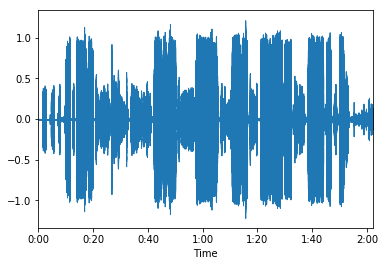

In [101]:
librosa.display.waveplot(call, sr=sr)

In [102]:
intervals = librosa.effects.split(call, top_db=20)         # voice activity detection
interval = intervals[0]

In [103]:
intervals

array([[  68096,   86016],
       [  94720,  113664],
       [ 200704,  219136],
       [ 226816,  244736],
       [ 326144,  331776],
       [ 334848,  345600],
       [ 420864,  432128],
       [ 434176,  464896],
       [ 465920,  477184],
       [ 478208,  492032],
       [ 492544,  499712],
       [ 542720,  553984],
       [ 555520,  563712],
       [ 610816,  626688],
       [ 627200,  633856],
       [ 634880,  639488],
       [ 642560,  670720],
       [ 673280,  684032],
       [ 684544,  692736],
       [ 697856,  703488],
       [ 705024,  714752],
       [ 718336,  755712],
       [ 757248,  762368],
       [ 790528,  800768],
       [ 801792,  805888],
       [ 806912,  835072],
       [ 836096,  852992],
       [ 854016,  861696],
       [ 862720,  868352],
       [ 871424,  877568],
       [ 920064,  936960],
       [ 940032,  952832],
       [ 958976,  962048],
       [ 965120,  968192],
       [ 969728,  976896],
       [ 986112,  987136],
       [ 989184,  992768],
 

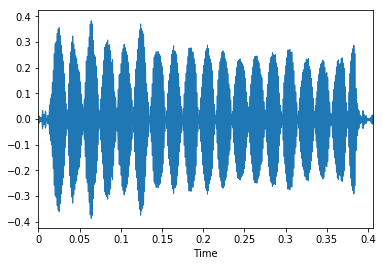

In [104]:
call_part = call[interval[0]:interval[1]]
librosa.display.waveplot(call_part, sr=sr)

In [ ]:
X = librosa.stft(call_part)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()


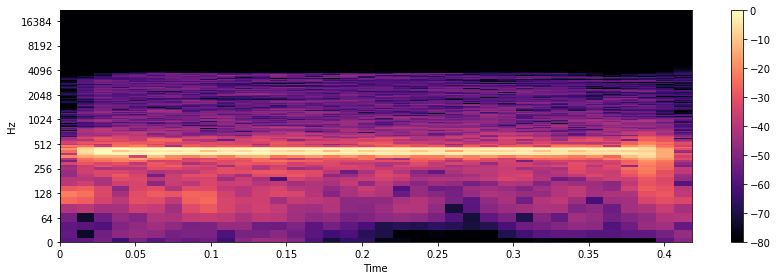

In [117]:
# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(call_part))
idx = slice(*librosa.time_to_frames([10, 15], sr=sr))

plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

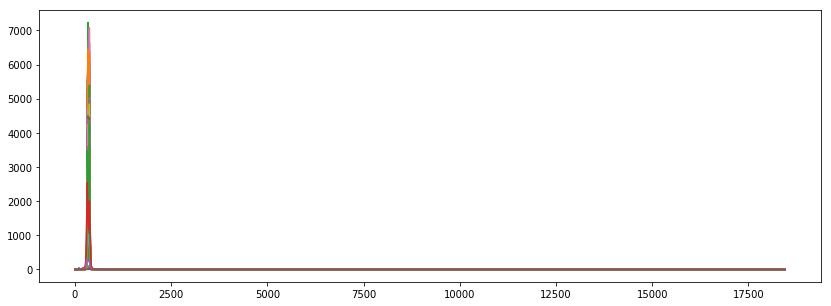

12360.05859375

In [144]:
X = librosa.stft(call_part)
X = abs(X)**2
plt.figure(figsize=(14, 5))

fft_f = librosa.fft_frequencies(sr=sr, n_fft=2048)
fft_freq = fft_f*np.size(X)/sr

plt.plot(fft_freq,X)
plt.show()

fft_freq[np.argmax(X)]

In [168]:
spect = librosa.core.stft(y=call_part)
spect = np.abs(spect) ** 2 #FIXME: maybe not?
#FIXME: maybe not?
mel_basis = librosa.filters.mel(sr=sr, n_fft=2048, n_mels=40)
spect_bins = np.log10(np.dot(mel_basis, spect) + 1e-6)           # log mel spectrogram of utterances

plt.figure(figsize=(14, 5))

fft_f = librosa.fft_frequencies(sr=sr, n_fft=2048)
fft_freq = fft_f*np.size(X)/sr

plt.plot(fft_freq,X)
plt.show()


In [161]:
np.argmax(X)

686

In [163]:
X

array([[1.2625111e-02, 1.5674723e-02, 4.3431111e-02, ..., 7.8492139e-06,
        1.5461578e-02, 8.4887221e-02],
       [1.7020958e-02, 2.8956306e-04, 3.2414321e-02, ..., 1.3845098e-02,
        3.9653298e-02, 1.6869995e-01],
       [1.5814405e-02, 1.0671738e-02, 7.1821641e-03, ..., 1.8528512e-01,
        2.6636326e-01, 1.8275457e-02],
       ...,
       [3.5429222e-09, 9.0065611e-10, 1.9790057e-13, ..., 1.0302685e-12,
        9.5276548e-08, 3.7793870e-07],
       [3.5152152e-09, 8.7153279e-10, 1.3690515e-14, ..., 1.1951210e-12,
        9.4805344e-08, 3.7797906e-07],
       [3.4923291e-09, 8.7369145e-10, 6.6627434e-15, ..., 1.3118166e-12,
        9.5413938e-08, 3.7811472e-07]], dtype=float32)

In [148]:
T = librosa.core.get_duration(call_part, sr=sr)
T

0.40634920634920635

In [160]:
N = np.size(call_part)
df = 1/T
f = np.array([df*n if n<N/2 else df*(n-N) for n in range(N)])
f

array([ 0.       ,  2.4609375,  4.921875 , ..., -7.3828125, -4.921875 ,
       -2.4609375])

In [140]:
fft_freq[np.argmax(X)]

686.0

In [158]:
f = np.fft.fftfreq(N)*N*df
f

array([ 0.       ,  2.4609375,  4.921875 , ..., -7.3828125, -4.921875 ,
       -2.4609375])

In [82]:
import numpy as np

In [6]:
file_path = "xxx"
call, sr = librosa.core.load(file_path)        # load call audio

In [ ]:
call_part1 = call[:librosa.core.time_to_samples(60)]
call_part2 = call[librosa.core.time_to_samples(62):]

ipd.Audio(call_part2, rate=sr) # load a NumPy array

In [20]:
librosa.output.write_wav(file_path+"_1", call_part1, sr, norm=False)
librosa.output.write_wav(file_path+"_2", call_part2, sr, norm=False)

In [10]:
# Noise reduction
import librosa
from pysndfx import AudioEffectsChain
import numpy as np
import math
#import python_speech_features
import scipy as sp
from scipy import signal

In [ ]:
#def reduce_noise_power(y, sr):
file_path = "xxx"
call, sr = librosa.core.load(file_path)        # load call audio
ipd.Audio(call, rate=sr) # load a NumPy array

In [ ]:
#def reduce_noise_power(y, sr):
cent = librosa.feature.spectral_centroid(y=call, sr=sr)

threshold_h = round(np.median(cent))*6
threshold_l = round(np.median(cent))*0.001

less_noise = AudioEffectsChain().lowshelf(gain=-50.0, frequency=threshold_l, slope=0.1).highshelf(gain=-30.0, frequency=threshold_h, slope=0.5)#.limiter(gain=6.0)
y_clean = less_noise(call)
np.amax(call - y_clean)

ipd.Audio(call - y_clean, rate=sr) # load a NumPy array

In [ ]:
cent = librosa.feature.spectral_centroid(y=call, sr=sr)

threshold_h = np.max(cent)
threshold_l = np.min(cent)

less_noise = AudioEffectsChain().lowshelf(gain=-12.0, frequency=threshold_l, slope=0.5).highshelf(gain=-12.0, frequency=threshold_h, slope=0.5).limiter(gain=6.0)

y_cleaned = less_noise(call)

ipd.Audio(y_cleaned-call, rate=sr) # load a NumPy array

In [ ]:
noise_start = 40
noise_end = 50

file_path = "xxx"
call, sr = librosa.core.load(file_path)        # load call audio
ipd.Audio(call, rate=sr) # load a NumPy array


In [78]:
noise = call[librosa.core.time_to_samples(noise_start):librosa.core.time_to_samples(noise_end)]
ipd.Audio(noise, rate=sr) # load a NumPy array
librosa.output.write_wav("noise", noise, sr, norm=False)


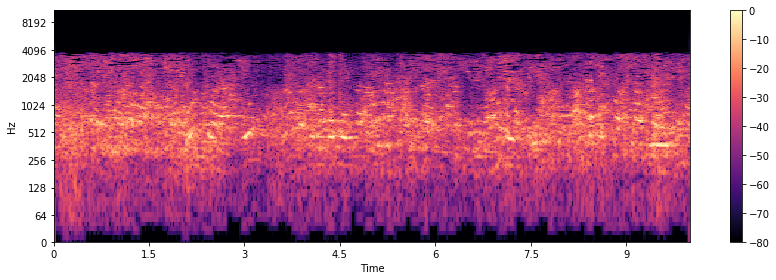

In [50]:
S_full, phase = librosa.magphase(librosa.stft(noise, n_fft=2048))

plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full, ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

In [46]:
S_full.shape


(1025, 431)

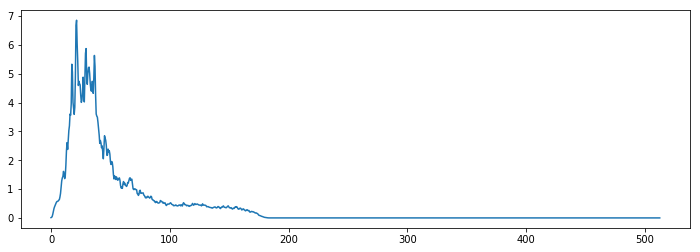

In [55]:
S_full_avg = np.average(S_full, axis=1)
plt.figure(figsize=(12, 4))

fft_f = librosa.fft_frequencies(sr=sr, n_fft=2048)
fft_freq = fft_f*np.size(S_full_avg)/sr

plt.plot(fft_freq, S_full_avg)


In [70]:
call_fft = librosa.stft(call, n_fft=2048)
S_full_avg_mat = np.matlib.repmat(S_full_avg, call_fft.shape[1], 1)
S_full_avg_mat = np.transpose(S_full_avg_mat)
clean_fft = call_fft - S_full_avg_mat

In [90]:
for file_name, time in call_split_times.items():
    call, sr = librosa.core.load(file_name)        # load call audio
    call_part1 = call[:librosa.core.time_to_samples(time)]
    call_part2 = call[librosa.core.time_to_samples(time):]

    ipd.Audio(call_part2, rate=sr) # load a NumPy array
    librosa.output.write_wav(file_name+"_1", call_part1, sr)
    librosa.output.write_wav(file_name+"_2", call_part2, sr)

In [92]:
file_name = "SBC005.mp3"
time = 9*60+3
call, sr = librosa.core.load(file_name)        # load call audio
call_part1 = call[:librosa.core.time_to_samples(time)]
call_part2 = call[librosa.core.time_to_samples(time):]

ipd.Audio(call_part2, rate=sr) # load a NumPy array
librosa.output.write_wav(file_name+"_1", call_part1, sr)
librosa.output.write_wav(file_name+"_2", call_part2, sr)